# Machine Learning: Linear Regression:

#### Linear Regression Model Representation:

In [32]:

import math
import numpy as np                                  # NumPy, a popular library for scientific computing 
import matplotlib.pyplot as plt                     # Matplotlib, a popular library for plotting data

# x_train is the input variable (size in 1000 square feet)
x_train = np.array([1.0, 2.0])                      
# x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])

# y_train is the target (price in 1000s of dollars)
y_train = np.array([300.0, 500.0])                  
# y_train = np.array([250, 300, 480,  430,   630, 730,])
print(f"x_train = {x_train}\ny_train = {y_train}")  # The data is stored in one-dimensional NumPy arrays.

print(f"\nx_train.shape: {x_train.shape} \ny_train.shape: {y_train.shape} ")
m = x_train.shape[0]                                # m is the number of training examples
# m = len(x_train)                                  # Alternate: Python len() function
print(f"Number of training examples is,  m : {m}")

# i = 1 # Change this to 1 to see (x^1, y^1)
print('\nTraining Datasets:')
for i in range (m):
    x_i, y_i = x_train[i], y_train[i]
    print(f"( x^({i}), y^({i}) ) = ({x_i}, {y_i})")

x_train = [1. 2.]
y_train = [300. 500.]

x_train.shape: (2,) 
y_train.shape: (2,) 
Number of training examples is,  m : 2

Training Datasets:
( x^(0), y^(0) ) = (1.0, 300.0)
( x^(1), y^(1) ) = (2.0, 500.0)


Plot for the Data:



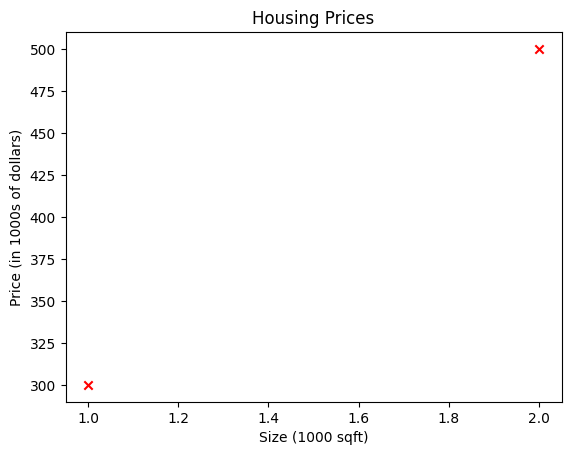

In [33]:
#Plot the Data:
print("Plot for the Data:\n")

# Plot the datapoints using the scatter() function in the matplotlib library:
plt.scatter(x_train, y_train, marker = 'x', c='r') 
     
plt.title("Housing Prices")                             # Set the Title 
plt.ylabel('Price (in 1000s of dollars)')               # Set the y-axis label
plt.xlabel('Size (1000 sqft)')                          # Set the x-axis label
plt.show()                                              # Displaying the plot

In [34]:
# Adjust the model's w and b parameters to simulate:
# w, b = 100, 100
# w, b = 300, 100
w, b = 200, 100
print(f"w: {w} \nb: {b} ")

w: 200 
b: 100 


#### Compute Model Output (Array): 

In [35]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,))  : Data, m examples 
      w,b (scalar)      : model parameters
    Returns
      y (ndarray (m,))  : target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

In [36]:
# Prediction of the Model:
tmp_f_wb = compute_model_output(x_train, w, b,)
print(f"Predicted House Prices (in 1000s of dollars): {tmp_f_wb}")

Predicted House Prices (in 1000s of dollars): [300. 500.]


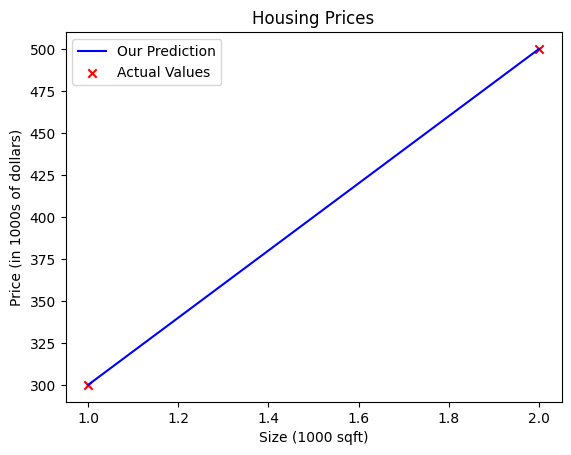

In [37]:
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

plt.title("Housing Prices")                     # Set the title
plt.ylabel('Price (in 1000s of dollars)')       # Set the y-axis label
plt.xlabel('Size (1000 sqft)')                  # Set the x-axis label
plt.legend()                                    # Show x-label & y-label as legend
plt.show()                                      # Displaying the plot

#### Compute Model Output (Scalar): 

In [38]:
# predict cost of new untrained data:

def compute_model_output_scalar(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (scalar)      : Data input
      w,b (scalar)    : model parameters 
    Returns
      y (scalar)      : prediction
    """
    y = w * x + b
    return y

In [39]:
# Original Prediction :
cost_1200sqft = compute_model_output_scalar(1.2, 200, 100)
print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


#### Compute Cost:

In [40]:
#Function to calculate the cost

def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression

    Args:
        x (ndarray (m,))    : Data, m examples
        y (ndarray (m,))    : target values
        w,b (scalar)        : model parameters

    Returns:
        total_cost (float)  : The cost of using w,b as the parameters for linear regression to fit the data points in x and y
    """
    m = x.shape[0]             # number of training examples

    cost_sum = 0 
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost

    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [41]:
cost = compute_cost(x_train, y_train, w, b)
print(f"Cost of the given data: {cost}")

Cost of the given data: 0.0


#### Gradient Descent for Linear Regression:
 
 To implement Gradient Descent, following functions are required:
 
 1. compute_gradient

 2. compute_cost 

 3. gradient_descent

 #### 1. Compute Gradient:

In [42]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w,b (scalar)      : model parameters  
    Returns
      dj_dw (scalar)    : The gradient of the cost w.r.t. the parameters w
      dj_db (scalar)    : The gradient of the cost w.r.t. the parameter b     
    """
    m = x.shape[0]      # NUmber of training examples
    dj_dw, dj_db = 0, 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = ( f_wb - y[i] ) * x[i]
        dj_db_i = f_wb - y[i] 
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

#### 3. Gradient Descent:

In [43]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w, b.
    Updates w, b by taking num_iters gradient steps with learning rate 'alpha'

    Args:
        x (ndarray (m,))        : Data, m examples
        y (ndarray (m,))        : target values
        w_in, b_in (scalars)    : initial values of model parameters
        alpha (float)           : Learning rate
        num_iters (int)         : number of iterations to run gradient descent
        cost_function           : function to call to produce cost
        gradient_function       : function to call to produce gradient

    Returns:
        w (scalar)              : Updated value of parameters after running gradient descent
        b (scalar)              : Updated value of parameters after running gradient descent
        J_history (List)        : History of cost of values
        p_history (List)        : history of parameters [w,b]

    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    w, b = w_in, b_in  # assigning initial values to w, b

    for i in range (num_iters):
        # Calculate the gradient and update the parameters using gradient_function simultaneously:
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using above dj_dw and dj_db:
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:      # prevent resource exhaustion
            cost = cost_function(x, y, w, b)
            J_history.append(cost)      # save cost J at each iteration
            p_history.append([w,b])     # save parameters w, b at each iteation

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0.0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w, b, J_history, p_history   #return w and J,w history for graphing

In [44]:
# Initialize parameters
w_init, b_init = 0, 0

# some gradient descent setting
iterations = 1000
tmp_alpha = 1.0e-2

# Run the gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w, b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration  100: Cost 8.68e+01  dj_dw: -2.057e+01, dj_db: -1.111e+01   w:  1.846e+02, b: 1.12410e+02
Iteration  200: Cost 1.10e+01  dj_dw: -1.273e+00, dj_db:  7.015e-01   w:  1.907e+02, b: 1.14646e+02
Iteration  300: Cost 9.48e+00  dj_dw: -6.373e-01, dj_db:  9.896e-01   w:  1.915e+02, b: 1.13710e+02
Iteration  400: Cost 8.19e+00  dj_dw: -5.757e-01, dj_db:  9.303e-01   w:  1.921e+02, b: 1.12748e+02
Iteration  500: Cost 7.08e+00  dj_dw: -5.347e-01, dj_db:  8.651e-01   w:  1.927e+02, b: 1.11851e+02
Iteration  600: Cost 6.12e+00  dj_dw: -4.971e-01, dj_db:  8.043e-01   w:  1.932e+02, b: 1.11017e+02
Iteration  700: Cost 5.29e+00  dj_dw: -4.621e-01, dj_db:  7.477e-01   w:  1.937e+02, b: 1.10242e+02
Iteration  800: Cost 4.57e+00  dj_dw: -4.296e-01, dj_db:  6.950e-01   w:  1.941e+02, b: 1.09521e+02
Iteration  900: Cost 3.95e+00  dj_dw: -3.993e-01, dj_db:  6.461e-01   w:  1.945e+02, b: 1.08851e+02


#### Cost vs iterations of gradient descent:

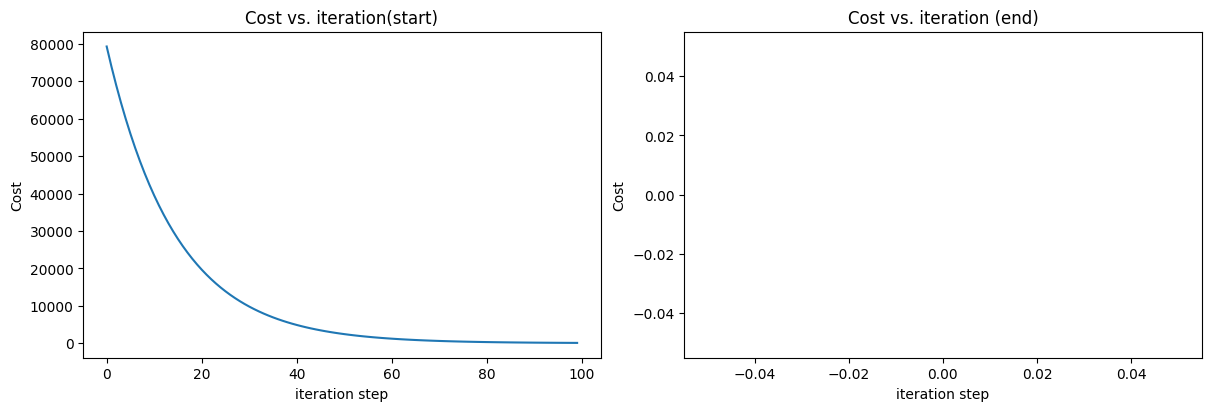

In [45]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")  ;  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')                      ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')            ;  ax2.set_xlabel('iteration step') 
plt.show()

#### Predictions:

In [46]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 303.1 Thousand dollars
1200 sqft house prediction 342.1 Thousand dollars
2000 sqft house prediction 498.1 Thousand dollars


In [47]:
# initialize parameters
w_init, b_init = 0, 0

# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04
